In [1]:
from PIL import Image
import numpy as np

def load_image(image_path):
    """Load an image from a file path."""
    return Image.open(image_path)

def hue_proportions(image):
    """Calculate the proportion of warm to cold hues in an image."""
    # Convert the image to RGB and then to HSV
    hsv_image = image.convert('RGB').convert('HSV')
    hsv_array = np.array(hsv_image)

    # Extract Hue channel
    hue = hsv_array[:, :, 0]  # Hue channel

    # Define hue ranges for warm and cold
    warm_hue_mask = (hue >= 0) & (hue <= 90)  # Warm hues (reds and oranges)


    # Count warm and cold hues
    proportion_warm = np.mean(warm_hue_mask)

    return proportion_warm

# Load the image
image_path = '/mnt/e/erya/collab_posts_ig/media/adidas/2550242203739871735/2550242203739871735_CNkR8XFH9n3_0.jpg'  # Specify the path to your image
image = load_image(image_path)

# Calculate the proportion of warm to cold hues
proportion = hue_proportions(image)

print(f"Proportion of Warm Hues to Cold Hues: {proportion}")


Proportion of Warm Hues to Cold Hues: 0.177159122085048


In [21]:
def hue_proportions_brightness_contrast_clarity(image):
    """Calculate the proportion of warm to cold hues in an image."""
    # Convert the image to RGB and then to HSV
    hsv_image = image.convert('RGB').convert('HSV')
    hsv_array = np.array(hsv_image)

    # Extract Hue channel
    hue = hsv_array[:, :, 0]  # Hue channel

    # Define hue ranges for warm and cold
    warm_hue_mask = (hue >= 0) & (hue <= 90)  # Warm hues (reds and oranges)

    # Calculate saturation
    saturation = np.mean(hsv_array[:, :, 1]) / 255

    # Count warm and cold hues
    proportion_warm = np.mean(warm_hue_mask)
    # Calculate brightness
    brightness = np.mean(hsv_array[:, :, 2]) / 255

    # Calculate contrast of brightness
    contrast = np.std(hsv_array[:, :, 2]) / 255

    # Scale pixel brightness to [0, 1]
    scaled_brightness = hsv_array[:, :, 2] / 255

    # Count pixels with brightness greater than 0.7
    bright_pixels = scaled_brightness[scaled_brightness > 0.7]
    num_bright_pixels = len(bright_pixels)

    # Calculate clarity
    clarity = num_bright_pixels / (hsv_array.shape[0] * hsv_array.shape[1])

    return proportion_warm, saturation, brightness, contrast, clarity

In [22]:
# Load the image
image_path = '/mnt/e/erya/collab_posts_ig/media/adidas/2550242203739871735/2550242203739871735_CNkR8XFH9n3_0.jpg'  # Specify the path to your image
image = load_image(image_path)

# Calculate the proportion of warm to cold hues
warm_hue, saturation, brightntess, contrast, clarity = hue_proportions_brightness_contrast_clarity(image)
print(f"Proportion of Warm Hues: {warm_hue}")
print(f"Saturation: {saturation}")
print(f"Brightness: {brightntess}")
print(f"Contrast: {contrast}")
print(f"Clarity: {clarity}")

Proportion of Warm Hues: 0.177159122085048
Saturation: 0.4043409989510207
Brightness: 0.45850043035046667
Contrast: 0.2658668241644651
Clarity: 0.14603772290809328


In [4]:
#hsv_image = image.convert('RGB').convert('HSV')
import cv2
hsv_image = image.convert('RGB').convert('HSV')
hsv_array = np.array(hsv_image)
saturation = hsv_array[:, :, 1].mean()
print(f"Saturation: {saturation}")

Saturation: 103.10695473251029


In [23]:
103.10695473251029/255

0.4043409989510207

In [7]:
import cv2
import numpy as np

def calculate_saturation(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Split the HSV image into separate channels
    _, saturation, _ = cv2.split(hsv_image)
    #saturation = hsv_image[:, :, 1].mean()
    # Calculate the average saturation value
    average_saturation = np.mean(saturation)

    return average_saturation

# Specify the path to your image
image_path = '/mnt/e/erya/collab_posts_ig/media/adidas/2550242203739871735/2550242203739871735_CNkR8XFH9n3_0.jpg'

# Calculate the saturation value for the image
saturation_value = calculate_saturation(image_path)

print(f"Average Saturation Value: {saturation_value}")

Average Saturation Value: 103.2196536351166


In [11]:
import numpy as np

# Calculate brightness
brightness = np.mean(hsv_array[:, :, 2])/255

# Calculate contrast of brightness
contrast = np.std(hsv_array[:, :, 2])/255

print(f"Brightness: {brightness}")
print(f"Contrast of Brightness: {contrast}")

Brightness: 0.45850043035046667
Contrast of Brightness: 0.2658668241644651


In [13]:
hsv_array[:, :, 2]/255

array([[0.63137255, 0.63137255, 0.63137255, ..., 0.55294118, 0.55294118,
        0.54901961],
       [0.63137255, 0.63137255, 0.63137255, ..., 0.55294118, 0.55294118,
        0.54901961],
       [0.63137255, 0.63137255, 0.63137255, ..., 0.55294118, 0.55294118,
        0.54901961],
       ...,
       [0.46666667, 0.43137255, 0.41568627, ..., 0.62745098, 0.61568627,
        0.63921569],
       [0.41568627, 0.40784314, 0.41568627, ..., 0.64313725, 0.60784314,
        0.6       ],
       [0.44313725, 0.45490196, 0.4745098 , ..., 0.65490196, 0.60392157,
        0.59607843]])

In [14]:
# Scale pixel brightness to [0, 1]
scaled_brightness = hsv_array[:, :, 2] / 255

# Count pixels with brightness greater than 0.7
bright_pixels = scaled_brightness[scaled_brightness > 0.7]
num_bright_pixels = len(bright_pixels)

# Calculate clarity
clarity = num_bright_pixels / (hsv_array.shape[0] * hsv_array.shape[1])

print(f"Clarity: {clarity}")

Clarity: 0.14603772290809328


In [16]:
len(bright_pixels)

212923

In [19]:
hsv_array.shape[0]

1350

In [20]:
hsv_array.shape[1]

1080

In [13]:
#normalized_proportion = (proportion - proportion.min()) / (proportion.max() - proportion.min())
# Convert the image to RGB and then to HSV
# Convert the image to RGB and then to HSV
hsv_image = image.convert('RGB').convert('HSV')
hsv_array = np.array(hsv_image)

# Extract Hue channel
hue = hsv_array[:, :, 0]  # Hue channel

# Define hue ranges for warm colors (e.g., yellow, red, orange)
#| ((hue >= 270) & (hue <= 360))
warm_hue_mask = ((hue >= 0) & (hue <= 90))   # Warm hues

# Calculate the proportion of warm pixels
proportion_warm = np.mean(warm_hue_mask)

print(f"Average Proportion of Warm Pixels: {proportion_warm}")


Average Proportion of Warm Pixels: 0.177159122085048


In [7]:
warm_hue_mask.shape

(1344, 1080)

In [2]:
import os
import json
#brands = [i.split('.')[0] for i in os.listdir('/mnt/e/erya/collab_posts_ig/id_2021_2024')]
brands = ['adidas']
for b in brands:
    with open('/mnt/e/erya/collab_posts_ig/id_2021_2024/{}.json'.format(b)) as f:
        goodids = json.load(f)
    print(len(goodids))
    jpg_files = []
    for root, dirs, files in os.walk("/mnt/e/erya/collab_posts_ig/media/{}".format(b), topdown=False):
        for name in files:
            if not name.startswith('.') and name.endswith('.jpg'):
                #print(name)
                #print(os.path.join(root, name))
                jpg_files.append(os.path.join(root, name))

    todo = [i for i in jpg_files if i.split('/')[-2] in goodids]
    print(b, len(todo))

199
adidas 293


In [8]:
todo[10]

'/mnt/e/erya/collab_posts_ig/media/adidas/2550242203739871735/2550242203739871735_CNkR8XFH9n3_0.jpg'

In [40]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

image = preprocess(Image.open('/mnt/e/erya/collab_posts_ig/media/adidas/2550242203739871735/2550242203739871735_CNkR8XFH9n3_0.jpg')).unsqueeze(0).to(device)
file_path = '/mnt/e/erya/collab_posts_ig/text/adidas/2550242203739871735.txt'

with open(file_path, 'r') as file:
    file_contents = file.read()
text = clip.tokenize([str(file_contents)]).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T
   

print("Similarity", similarity)  # prints: [[0.9927937  0.00421068 0.00299572]]

RuntimeError: Input Fast fact: Plastic waste is a mountain problem. It’s found everywhere from the steepest peaks to the deepest corners of our planet. But when the stakes are high, we don’t back down. Join trail runner Timothy Olson (@timothyallenolson) for a run and clean-up event that can bring us one step closer to healthy, waste-free ecosystems. Tune in and lace up—it’s time to climb 🗻  #EndPlasticWaste is too long for context length 77

In [46]:
import os
os.chdir('/home/research/Long-CLIP')
from model import longclip
import torch
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = longclip.load("./checkpoints/longclip-B.pt", device=device)

text = longclip.tokenize([file_contents]).to(device)
image = preprocess(Image.open("/mnt/e/erya/collab_posts_ig/media/adidas/2550242203739871735/2550242203739871735_CNkR8XFH9n3_0.jpg")).unsqueeze(0).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T

print("Similarity:", similarity) 

Similarity: [[0.3086]]


In [53]:
!pwd

/home/research/Long-CLIP


In [52]:
similarity.tolist()[0][0]

0.30859375

In [47]:
len(file_contents)

391

In [31]:
file_path = '/mnt/e/erya/collab_posts_ig/text/adidas/2550242203739871735.txt'

with open(file_path, 'r') as file:
    file_contents = file.read()

print(file_contents)

Fast fact: Plastic waste is a mountain problem. It’s found everywhere from the steepest peaks to the deepest corners of our planet. But when the stakes are high, we don’t back down. Join trail runner Timothy Olson (@timothyallenolson) for a run and clean-up event that can bring us one step closer to healthy, waste-free ecosystems. Tune in and lace up—it’s time to climb 🗻  #EndPlasticWaste


In [38]:
str(file_contents)

'Fast fact: Plastic waste is a mountain problem. It’s found everywhere from the steepest peaks to the deepest corners of our planet. But when the stakes are high, we don’t back down. Join trail runner Timothy Olson (@timothyallenolson) for a run and clean-up event that can bring us one step closer to healthy, waste-free ecosystems. Tune in and lace up—it’s time to climb 🗻  #EndPlasticWaste'

In [32]:
type(file_contents)

str

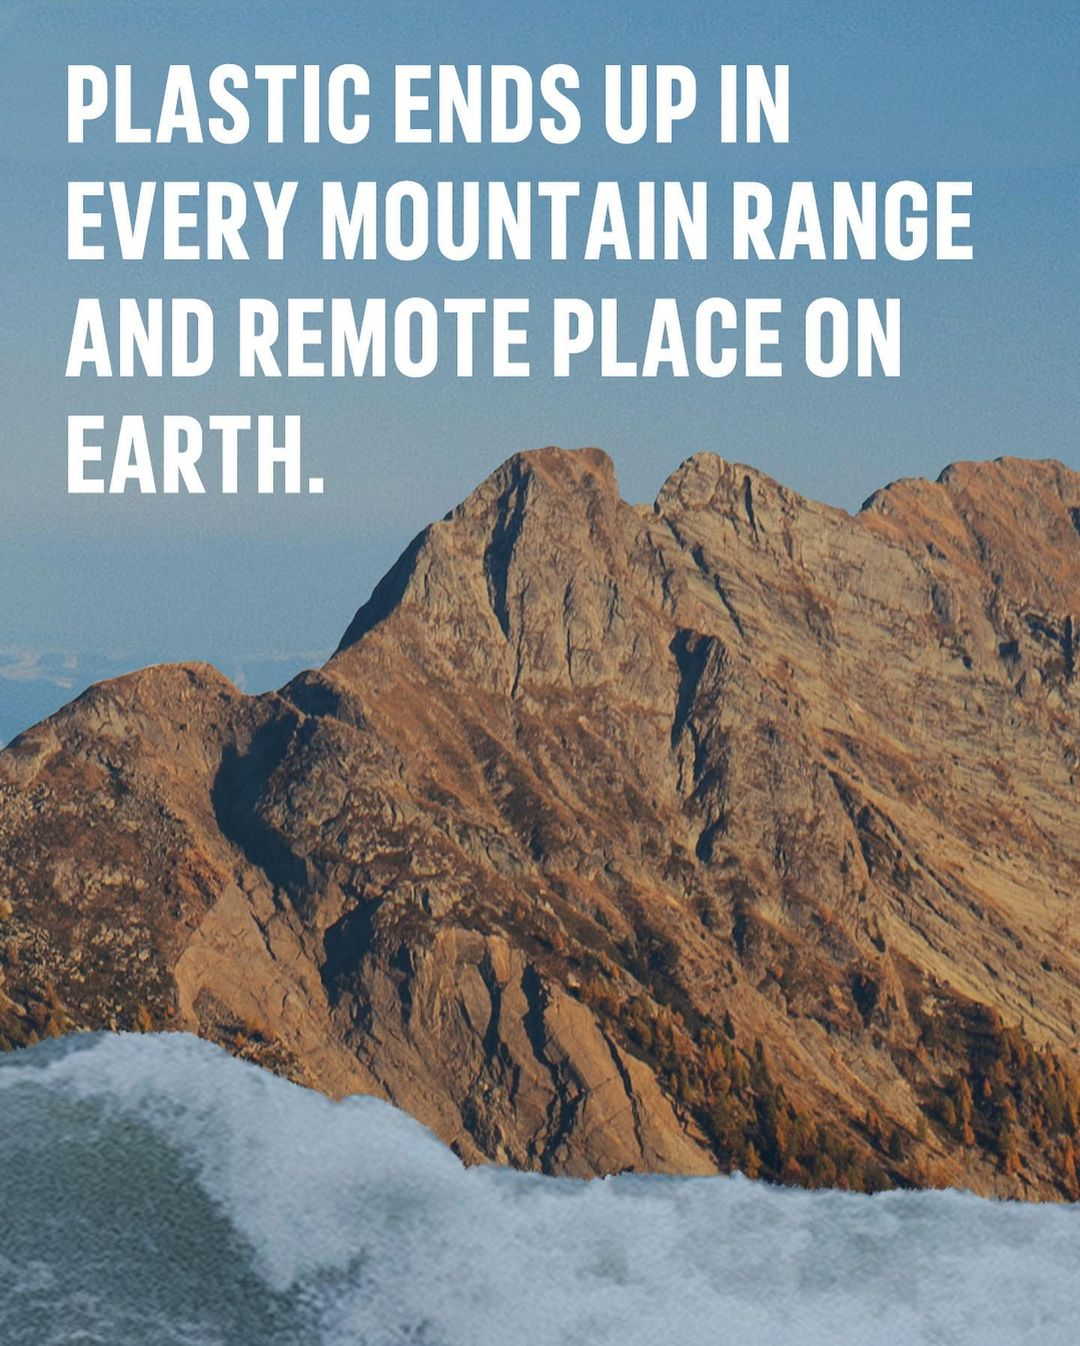

In [5]:
from IPython.display import Image 
pil_img = Image(filename='/mnt/e/erya/collab_posts_ig/media/adidas/2550242203739871735/2550242203739871735_CNkR8XFH9n3_1.jpg')
display(pil_img)

In [28]:
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T
     

In [29]:
similarity

array([[0.1549]], dtype=float16)

In [6]:
import pyaesthetics
img = "/mnt/e/erya/collab_posts_ig/media/alexandermcqueen/2818272533695999735/2818272533695999735_ADMK73_0.jpg" #path to a sample image
results = pyaesthetics.analysis.analyzeImage(img, method="complete") #perform all the availabe analysis using standard parameters
print(results)

{'Text': 3, 'brightness_BT709': 0.0435248339547281, 'brightness_BT601': 0.04507721048324792, 'VC_quadTree': 286, 'VC_weight': 127625, 'Symmetry_QTD': 49.122807017543856, 'Colorfulness_HSV': 184.1150976174659, 'Colorfulness_RGB': 20.781539790160164, 'Faces': array([[177,  15, 102, 102]], dtype=int32), 'Number_of_Faces': 1, 'Colors': [['Aqua', 0.0], ['Black', 69.5], ['Blue', 0.0], ['Fuchsia', 0.0], ['Gray', 24.5825], ['Green', 0.0], ['Lime', 0.0], ['Maroon', 0.8141666666666667], ['Navy', 3.47], ['Olive', 0.21458333333333335], ['Purple', 0.66125], ['Red', 0.0], ['Silver', 0.7354166666666667], ['Teal', 0.009583333333333334], ['White', 0.0125], ['Yellow', 0.0]], 'Number_of_Images': 0, 'TextImageRatio': 1.0, 'textArea': 871320, 'imageArea': 0}
